## Radiative Flux Variation of Pleiades Stars

This notebook reconstructs and visualizes the radiative flux variations of the seven brightest Pleiades stars (Alcyone, Atlas, Electra, Maia, Merope, Taygeta, and Pleione) using Fourier parameters from provided CSV files.

Light curves are graphs that show the brightness of an object over a period of time. In the study of objects which change their brightness over time, such as novae, supernovae, and variable stars, the light curve is a simple but valuable tool to a scientist.

The light curves are reconstructed by summing sinusoidal components based on extracted frequency, amplitude, and phase information. The final plot contains seven subplots showing the flux variations over time for each star.

This analysis is based on the data and methodology from:
[White, T. R., Pope, B. J. S., Antoci, V., et al. (2017). "Beyond the Kepler/K2 bright limit: variability in the seven brightest members of the Pleiades." 
MNRAS, 471(3), 2882-2901. doi:10.1093/mnras/stx1050](https://academic.oup.com/mnras/article/471/3/2882/4081952?login=false)


Alcyone
               ID  Frequency  Amplitude  Phase   SNR
0    ν1 ∼ ν4 − ν3     0.1482       63.0    2.2   7.6
1              ν2     0.4215       49.0    0.9   7.1
2              ν3     0.4360      151.0   -2.9  17.5
3              ν4     0.5798       18.0   -2.4   4.0
4              ν5     0.7452       25.0   -0.5   5.0
5              ν6     0.7922       36.0   -0.5   6.6
6              ν7     0.8084       28.0   -1.0   5.2
7              ν8     0.8266       24.0   -0.2   4.5
8        ν9 ∼ 2ν3     0.8729       35.0    0.8   5.8
9       ν10 ∼ 3ν3     1.3051       14.0   -2.5   4.2
10      ν11 ∼ 2ν8     1.6480       18.0   -1.8   4.9
11  ν12 ∼ ν6 + ν9     1.6648       34.0   -1.8   5.5
12      ν13 ∼ 4ν2     1.6871       38.0    0.7   6.9
13      ν14 ∼ 4ν3     1.7483       13.0   -0.2   4.1
14            ν15     3.4530        7.0   -3.0   4.2
15            ν16    23.7310        5.0    1.3   4.4
Atlas
              ID  Frequency  Amplitude  Phase   SNR
0             ν1     0.4119     2

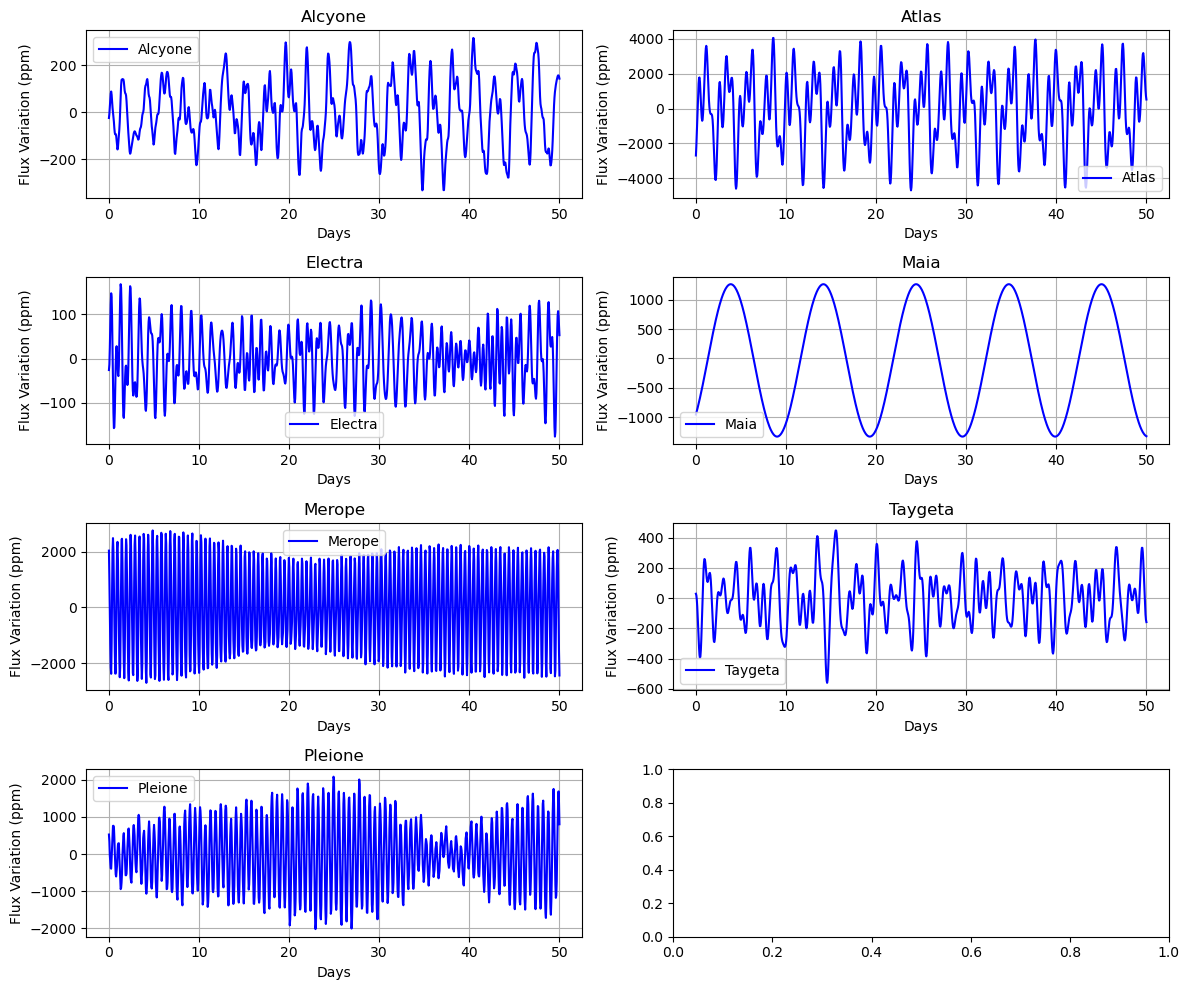

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of star names
names = ['Alcyone', 'Atlas', 'Electra', 'Maia', 'Merope', 'Taygeta', 'Pleione']

# Define time array (spanning several periods)
days = np.linspace(0, 50, 1000)  # 50 days sampled at 1000 points

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()

for i, name in enumerate(names):
    try:
        # Load the CSV file
        csv_file_path = f"./data/Pleidies-light-curve-fourier - {name}.csv"
        df = pd.read_csv(csv_file_path)
        
        # Remove header row if necessary
        df = df.iloc[1:].reset_index(drop=True)

        # Function to parse numerical values from "±" notation
        def parse_value(value):
            if isinstance(value, str):
                value = value.replace("−", "-").split("±")[0].strip()
            try:
                return float(value)
            except ValueError:
                return np.nan

        # Apply parsing function to Frequency, Amplitude, and Phase
        df["Frequency"] = df["Frequency"].apply(parse_value)
        df["Amplitude"] = df["Amplitude"].apply(parse_value)
        df["Phase"] = df["Phase"].apply(parse_value)

        #print(name)
        #print(df)
        
        # Drop any rows with NaN values
        df = df.dropna().reset_index(drop=True)

        # Reconstruct the flux using a sum of sinusoids
        flux = np.zeros_like(days)
        for _, row in df.iterrows():
            flux += row["Amplitude"] * np.sin(2 * np.pi * row["Frequency"] * days + row["Phase"])

        # Normalize flux to match expected scale
        flux -= np.mean(flux)

        # Plot the reconstructed light curve
        ax = axes[i]
        ax.plot(days, flux, label=f"{name}", color="b")
        ax.set_xlabel("Days")
        ax.set_ylabel("Flux Variation (ppm)")
        ax.set_title(f"{name}")
        ax.legend()
        ax.grid()
    except Exception as e:
        print(f"Error processing {name}: {e}")

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("./data/radiative_flux_plot.png", dpi=300)

# Show the plot
plt.show()


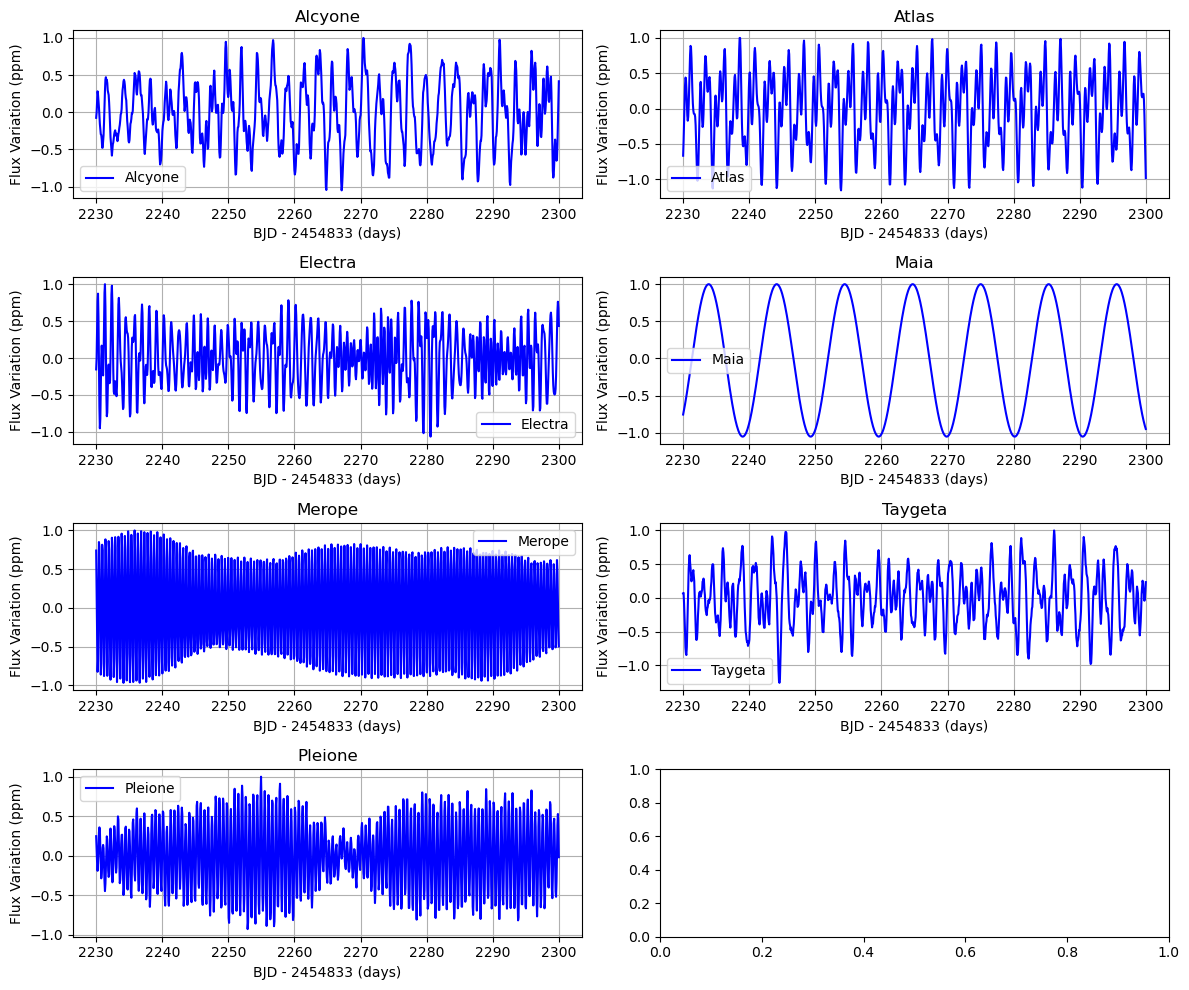

In [38]:
"""
Radiative Flux Variation of Pleiades Stars

This notebook reconstructs and visualizes the radiative flux variations of the seven brightest Pleiades stars 
(Alcyone, Atlas, Electra, Maia, Merope, Taygeta, and Pleione) using Fourier parameters from provided CSV files.
The light curves are reconstructed by summing sinusoidal components based on extracted frequency, amplitude, 
and phase information. The final plot contains six subplots showing the flux variations over time for each star.

This analysis is based on the data and methodology from:
White, T. R., Pope, B. J. S. S., Antoci, V., et al. (2017). "Beyond the Kepler/K2 bright limit: variability in the seven brightest members of the Pleiades." 
MNRAS, 471(3), 2882-2901. doi:10.1093/mnras/stx1050
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of star names
names = ['Alcyone', 'Atlas', 'Electra', 'Maia', 'Merope', 'Taygeta', 'Pleione']

# Define time array to match BJD-2454833 from 2230 to 2300
days = np.linspace(2230, 2300, 1000)  # Time in BJD-2454833 (days)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()

for i, name in enumerate(names):
    try:
        # Load the CSV file
        csv_file_path = f"./data/Pleidies-light-curve-fourier - {name}.csv"
        csv_output_file_path = f"./data/Pleidies-timeseries - {name}.csv"
        df = pd.read_csv(csv_file_path)
        
        # Remove header row if necessary
        df = df.iloc[1:].reset_index(drop=True)

        # Function to parse numerical values from "±" notation
        def parse_value(value):
            if isinstance(value, str):
                value = value.replace("−", "-").split("±")[0].strip()
            try:
                return float(value)
            except ValueError:
                return np.nan

        # Apply parsing function to Frequency, Amplitude, and Phase
        df["Frequency"] = df["Frequency"].apply(parse_value)
        df["Amplitude"] = df["Amplitude"].apply(parse_value)
        df["Phase"] = df["Phase"].apply(parse_value)

        # Drop any rows with NaN values
        df = df.dropna().reset_index(drop=True)

        # Reconstruct the flux using a sum of sinusoids
        flux = np.zeros_like(days)
        for _, row in df.iterrows():
            flux += row["Amplitude"] * np.sin(2 * np.pi * row["Frequency"] * (days - 2230) + row["Phase"])

        # Normalize flux to match expected scale
        flux -= np.mean(flux)
        flux /= max(flux)      

        # Plot the reconstructed light curve
        ax = axes[i]
        ax.plot(days, flux, label=f"{name}", color="b")
        ax.set_xlabel("BJD - 2454833 (days)")
        ax.set_ylabel("Flux Variation (ppm)")
        ax.set_title(f"{name}")
        ax.legend()
        ax.grid()
        # Convert to DataFrame
        df2 = pd.DataFrame({
            "date": days,
            "flux": flux,
        })
        
        # Print sample data
        #print(df2.head())
        df2.to_csv(csv_output_file_path, index=False)

    except Exception as e:
        print(f"Error processing {name}: {e}")


# Adjust layout
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("./data/radiative_flux_plot.png", dpi=300)

# Show the plot
plt.show()


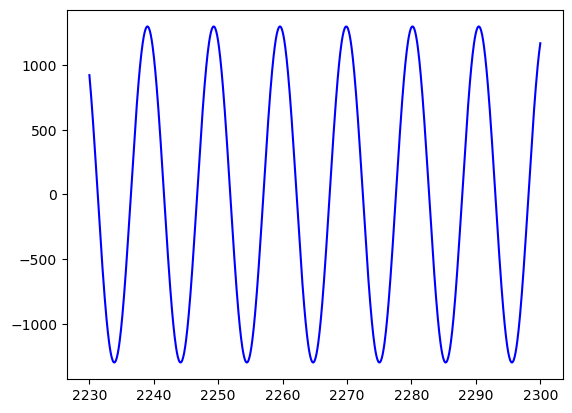

In [62]:
#0.0972     1300.0  -0.79  34.0
days = np.linspace(2230, 2300, 1000)  # Time in BJD-2454833 (days)
flux = -1300 * np.sin(2 * np.pi * 0.0972 * (days - 2230) - .79)
plt.plot(days, flux, label=f"{name}", color="b")

In [55]:
np.cos(0)

np.float64(1.0)